In [1]:
import numpy as np
from matplotlib import pyplot as plt

import split

%matplotlib inline

In [2]:
l = 16
color = False
train_ids, val_ids, test_ids, train_labels, val_labels, test_labels = split.two_balanced_classes()
train_data, val_data, test_data = split.load_images(train_ids, val_ids, test_ids, l, color)

In [3]:
def test(test_data, test_labels, l, intercept):
    N, d = test_data.shape
    assert (d == l*l)
    sum_east = np.zeros(N)
    sum_west = np.zeros(N)
    sum_north = np.zeros(N)
    sum_south = np.zeros(N)
    cut = int(l/2)
    for i in range(N):
        image = test_data[i, :].reshape((l, l))
        sum_east[i] = image[:, :cut].sum()
        sum_west[i] = image[:, cut:].sum()
        sum_north[i] = image[:cut, :].sum()
        sum_east[i] = image[cut:, :].sum()
        
    delta_east_west = intercept+np.abs(sum_east - sum_west)
    delta_north_south = np.abs(sum_north - sum_south)
    
    predicted_classes = 1+(delta_east_west<delta_north_south)

    error_rate = (test_labels!=predicted_classes).sum()/len(test_labels)
    
    return error_rate

In [4]:
intercept_values = range(0, 20000, 100)
error_rates = []
for intercept in intercept_values:
    error_rates.append(test(test_data, test_labels, l, intercept))

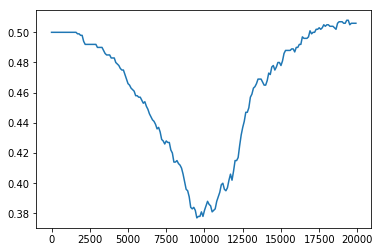

In [5]:
plt.plot(intercept_values, error_rates)